<a href="https://colab.research.google.com/github/gr3g-z/CreditAnalisys-FraudDetection/blob/main/CreditAnalisys%26Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  (CRISP-DM)

* Abordagem comumente utilizada por especialistas em mineração de dados para resolver problemas

<p align="center">
<img src = "https://www.escoladnc.com.br/blog/wp-content/webp-express/webp-images/uploads/2020/10/crispdm.png.webp" width="70%"/>
</p>




# Detecção de Fraude


## Contexto

Texto e Dataset retirado da plataforma Kaglle

- There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.
We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

- PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

- This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

link: https://www.kaggle.com/datasets/ealaxi/paysim1

This work is part of the research project ”Scalable resource-efficient systems for big data analytics” funded
by the Knowledge Foundation (grant: 20140032) in Sweden.

PaySim first paper of the simulator:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

## Descrição do Dataset

* [ step ] - Faz juz a uma unidade de tempo no mundo real. Neste caso 1 == 1 hora de tempo. Totalizando 744 steps (30 dias de simulação).

* [ type ] - (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER).

* [ amount ] - Quantidade de dinheiro transacionado na moeda local.

* [ nameOrig ] - Cliente origem da transação.

* [ oldbalanceOrg ] - Balanço inicial da conta do rementente.

* [ newbalanceOrig ] - Balanço após a transação do rementente.

* [ nameDest ] - Cliente destinatário da transação.

* [ oldbalanceDest ] - Balanço inicial da conta do destinatário. Não existem informações sobre clientes que começam com "M" os (Merchants == Comerciantes).

* [ newbalanceDest ] - Balanço após a transação da conta do destinatário. Não existem informações sobre clientes que começam com "M" os (Merchants == Comerciantes).

* [ isFraud ] - Transações identificadas como fraudulentas. ex: tentativas de esvaziar as contas dos clientes em um curto periodo de tempo ou de uma vez só.

* [ isFlaggedFraud ] - Modelo de negócio que controla transferências massivas e as marca como fransferencias ilegais. ex: tentar transferir mais de 200.000 em uma única transação.



-------



## Bibliotecas & Frameworks

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import xgboost as xgb

## Entendimento, Tratamento e Limpeza dos Dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditFraud/PS_20174392719_1491204439457_log.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
print("Número de Registros:\t",df.shape[0])
print("Número de Features:\t",df.shape[1])

Número de Registros:	 6362620
Número de Features:	 11


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Número de transações iguais a zero
len(df[df.amount==0])

16

In [ ]:
# Contagem de Fraudes
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
#Contagem da quantidade dos tipos de pagamentos
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

## Preparação dos Dados & Gráficos

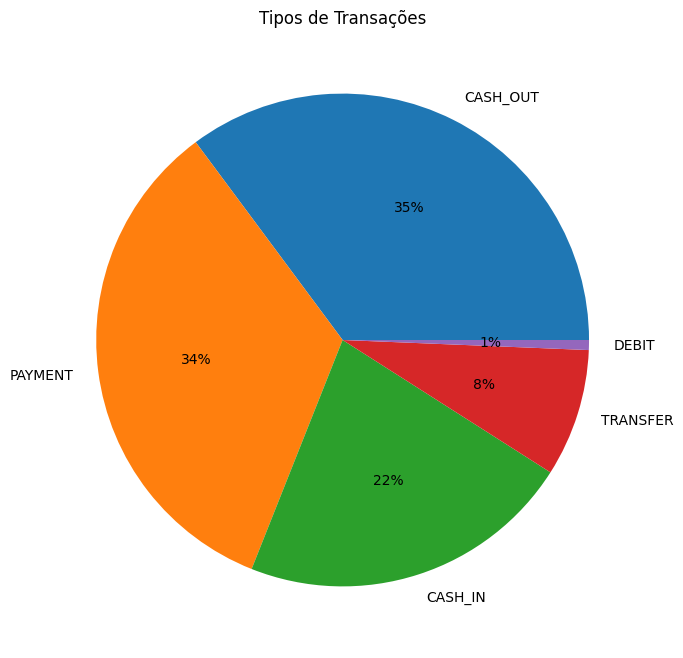

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Tipos de Transações")
plt.show()

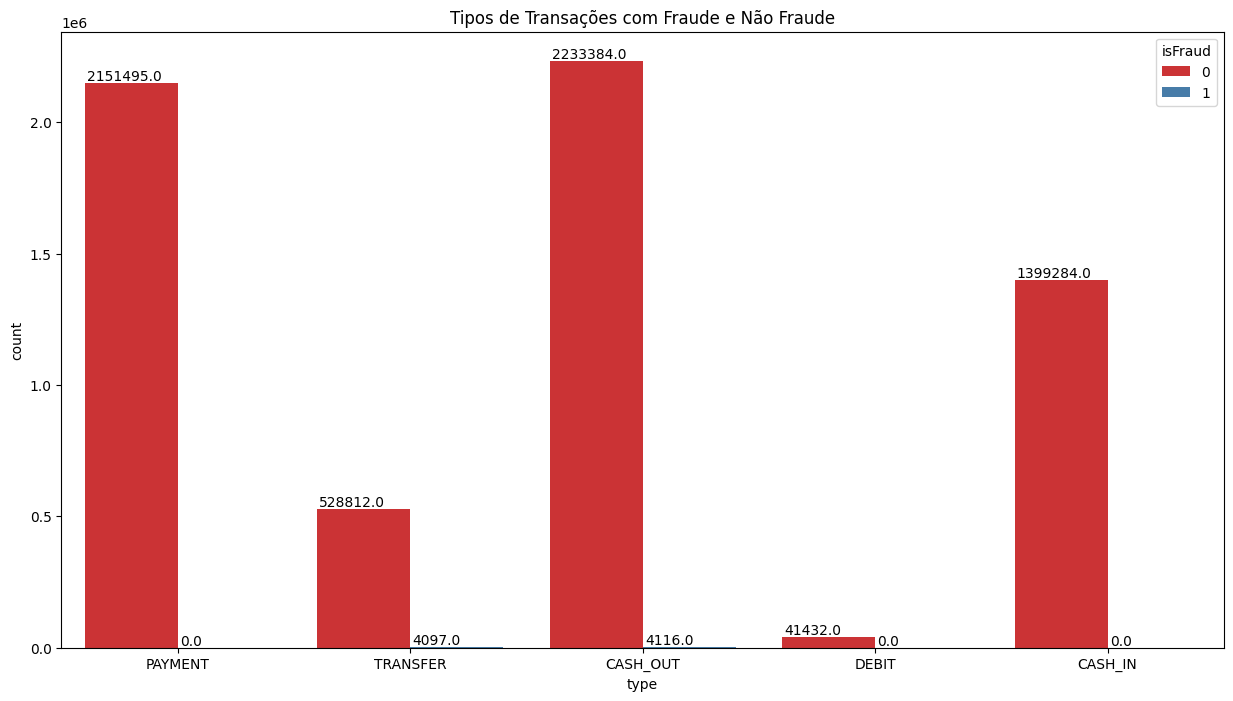

In [ ]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = df, x = "type", hue="isFraud", palette = 'Set1')
plt.title('Tipos de Transações com Fraude e Não Fraude')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

* Checando tipos de movimentações fraudulentas.

In [ ]:
fraud_size=df[df['isFraud'].isin([1])].groupby(['type']).size()
fraud_size

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

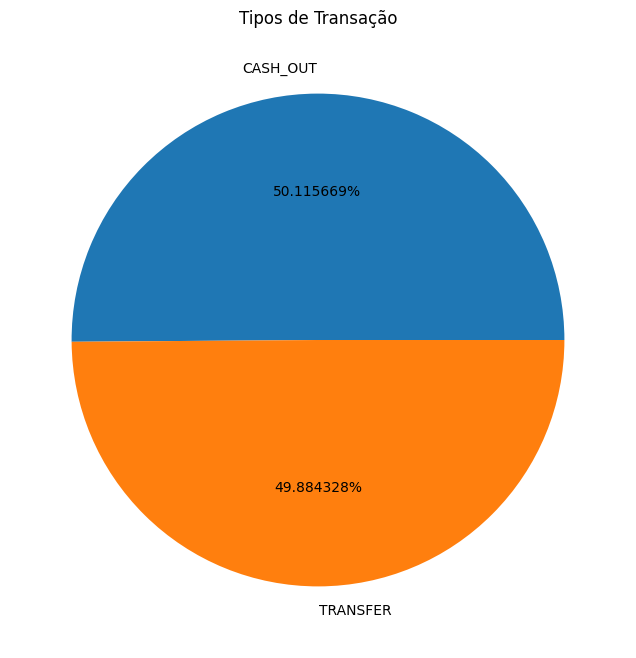

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(fraud_size.values,labels=fraud_size.index, autopct='%.6f%%')
plt.title("Tipos de Transação")
plt.show()

* Checando origem das transações fraudulentas

In [ ]:
transfer_fraud = df[((df['type']=='TRANSFER') & df['isFraud']==1)]
transfer_fraud['nameOrig'].value_counts()

C1305486145    1
C202278158     1
C12585107      1
C946427395     1
C1069177491    1
              ..
C2090764492    1
C1794935564    1
C318078280     1
C939293281     1
C1685995037    1
Name: nameOrig, Length: 4097, dtype: int64

* Checando destino das transacões fraudulentas

In [ ]:
cash_out_fraud = df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)]
cash_out_fraud['nameDest'].value_counts()

C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: nameDest, Length: 4091, dtype: int64

In [ ]:
df_temp = df[df.isFlaggedFraud==1]
print("Quantas transações fraudulentas foram marcadas (flagged)?:")
print(len(df_temp))
print("Qual tipo de transação?")
print(df_temp['type'].value_counts().index[0])
print("Todas que foram marcadas são fraudes?")
print(df_temp['isFraud'].value_counts()[1] == len(df_temp))

Quantas transações fraudulentas foram marcadas (flagged)?:
16
Qual tipo de transação?
TRANSFER
Todas que foram marcadas são fraudes?
True


In [ ]:
fraud_step = df[df['isFraud'].isin([1])].groupby(['step']).size()
print("Step wise fraud transcations percentage: ",(fraud_step.count()/df['step'].unique().shape[0])*100)

Step wise fraud transcations percentage:  99.7308209959623


In [ ]:
#fraud_step.plot(kind='bar',figsize=(40,45))

* Alterando a Coluna Type, tipos de transferencias além de 'transfer' e 'cash_out' não são relevantes.

In [ ]:
new_type = {'PAYMENT':'OTHERS', 'TRANSFER':'TRANSFER', 'CASH_OUT':'CASH_OUT', 'DEBIT':'OTHERS', 'CASH_IN':'OTHERS'}
df['type']=df['type'].map(new_type)
df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

* Alterando remetenetes e destinatários para melhor identificar onde as fraudes acontecem.

In [ ]:
data = df.copy()
data['type2'] = np.nan
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'type2'] = 'CC'
data.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), 'type2'] = 'CM'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MC'
data.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MM'

In [ ]:
data.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'], axis = 'columns', inplace = True)

* Fraude == 1
* Não Fraude == 0

In [ ]:
fraud_trans = data[data['isFraud'] == 1]
valid_trans = data[data['isFraud'] == 0]

print('Número de fraudes de acordo com cada tipo:\n', fraud_trans.type2.value_counts())
print('\n Número de transações válidas de acordo com cada tipo:\n', valid_trans.type2.value_counts())

Número de fraudes de acordo com cada tipo:
 CC    8213
Name: type2, dtype: int64

 Número de transações válidas de acordo com cada tipo:
 CC    4202912
CM    2151495
Name: type2, dtype: int64


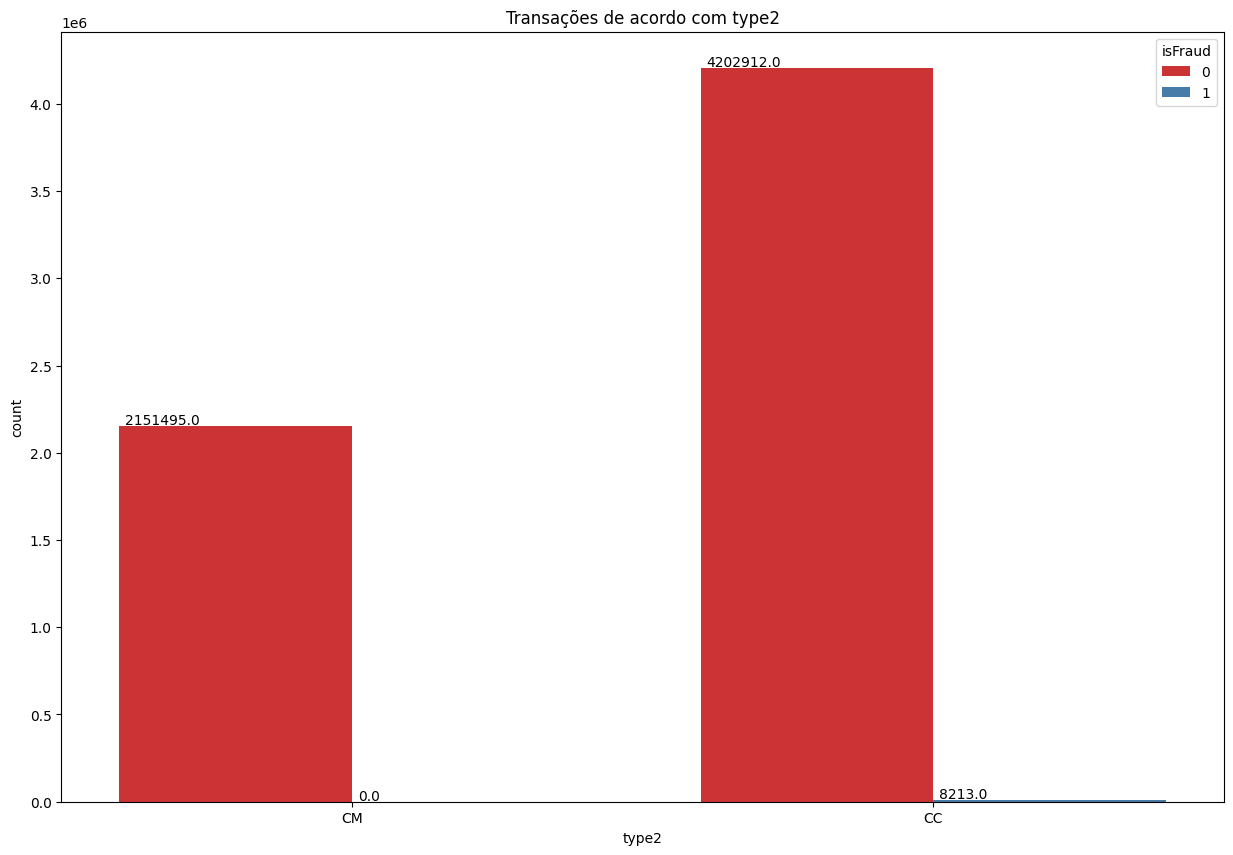

In [ ]:
plt.figure(figsize = (15,10))
ax=sns.countplot(data = data, x = "type2", hue="isFraud", palette = 'Set1')
plt.title('Transações de acordo com type2')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

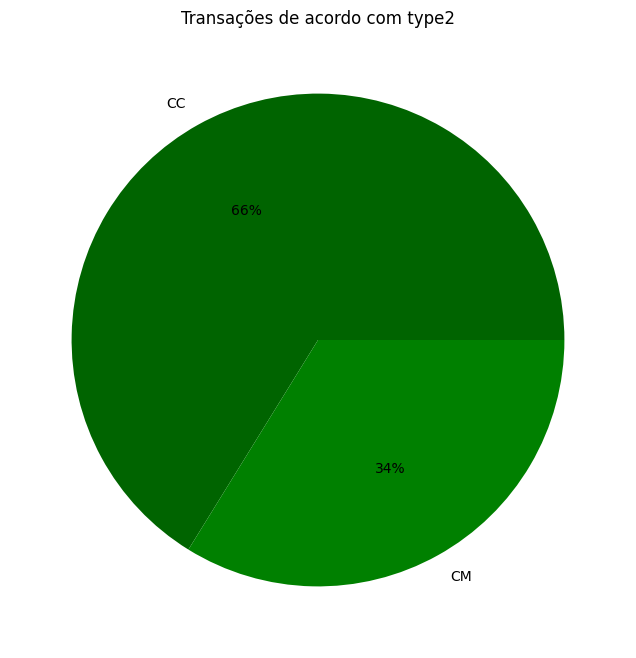

In [ ]:
plt.figure(figsize=(15,8))
colors = ['#006400','#008000']
plt.pie(data.type2.value_counts().values,labels=data.type2.value_counts().index, colors = colors,  autopct='%.0f%%')
plt.title("Transações de acordo com type2")
plt.show()

In [ ]:
data = pd.get_dummies(data, prefix = ['type', 'type2'], drop_first = False)

## Machine Learning

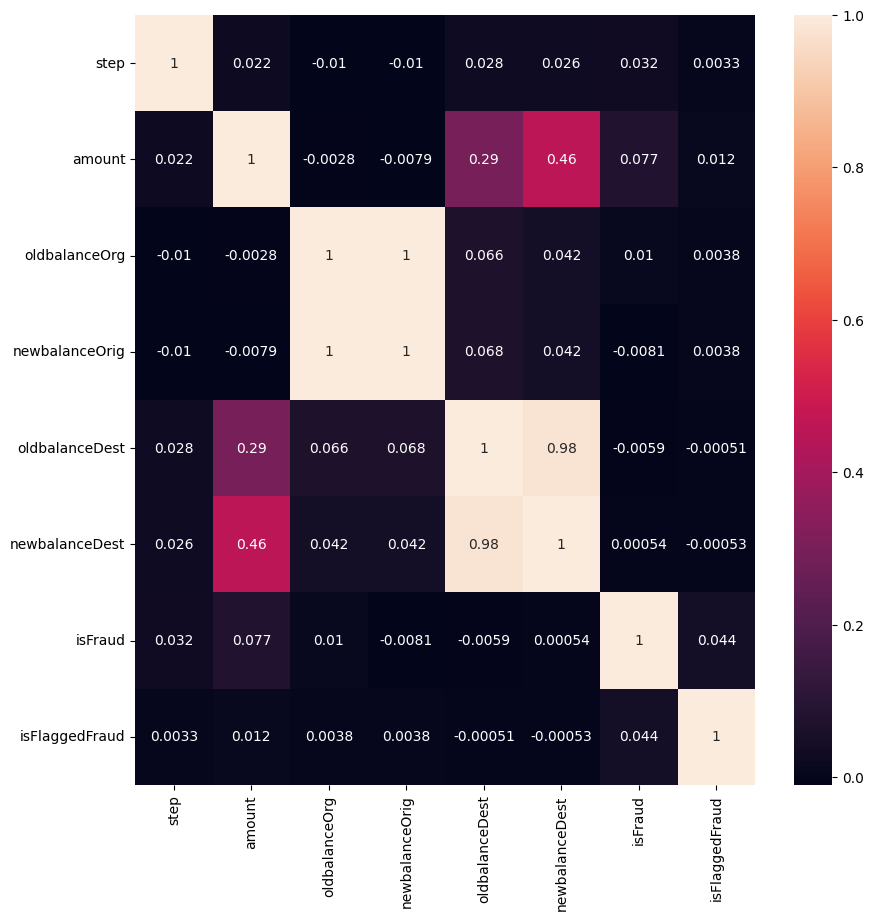

In [ ]:
# Mapa de correlação das features.
lst= ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
df_corr= df[lst].corr()
plt.figure(figsize= (10,10))
sns.heatmap(df_corr,annot= True)
plt.show()

* Montagem das Features e Target

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(data.drop('isFraud', axis = 1), data['isFraud'], test_size = 0.3, random_state = 42)
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Shape of X_train :',X_train.shape)
print('Shape of y_train :',y_train.shape)

Shape of X_train : (8896112, 11)
Shape of y_train : (8896112,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Modelo XgBoost

In [ ]:
model= xgb.XGBClassifier(max_depth = 3, n_jobs = -1, learning_rate = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

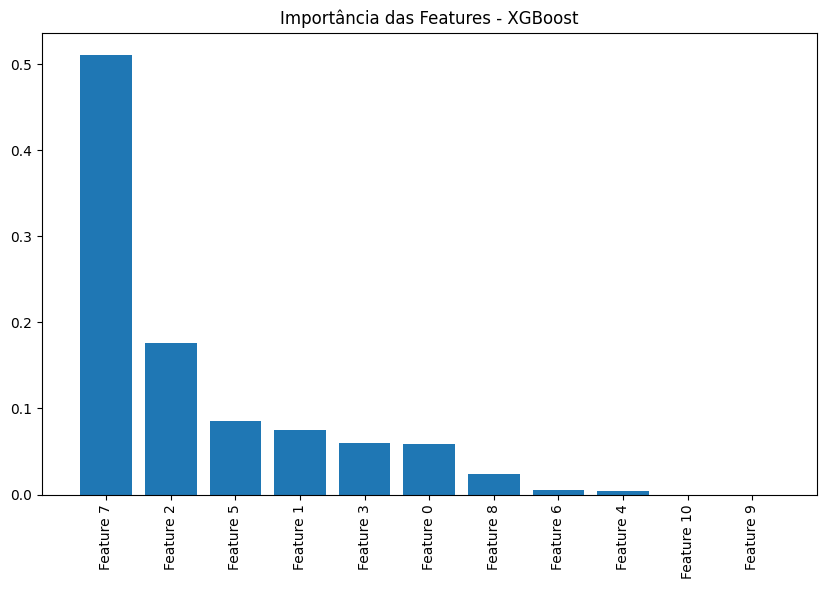

In [ ]:
# Obtendo a importância das features
importances = model.feature_importances_

# Criando uma lista de nomes de features (substitua com seus próprios nomes se disponíveis)
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Ordenando as importâncias em ordem decrescente
indices = importances.argsort()[::-1]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Importância das Features - XGBoost")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<Figure size 2000x1000 with 0 Axes>

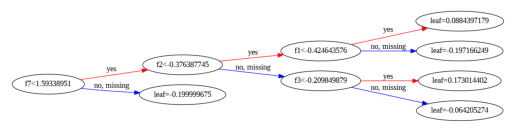

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Supondo que model é o seu modelo treinado
# Você pode escolher o índice da árvore que deseja visualizar (por exemplo, a primeira árvore é index=0)
tree_index = 0

# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=tree_index, rankdir='LR')
plt.show()


In [ ]:
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)

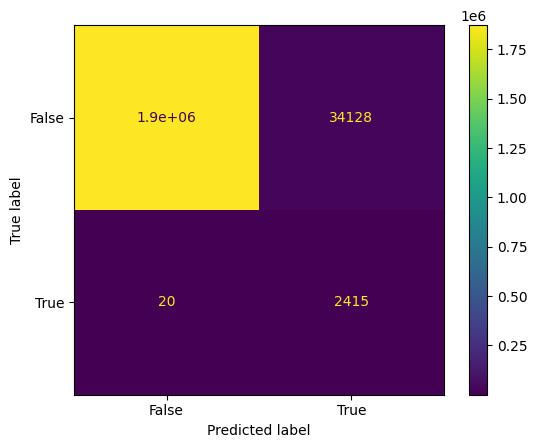

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("\n",metrics.classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906351
           1       0.07      0.99      0.12      2435

    accuracy                           0.98   1908786
   macro avg       0.53      0.99      0.56   1908786
weighted avg       1.00      0.98      0.99   1908786



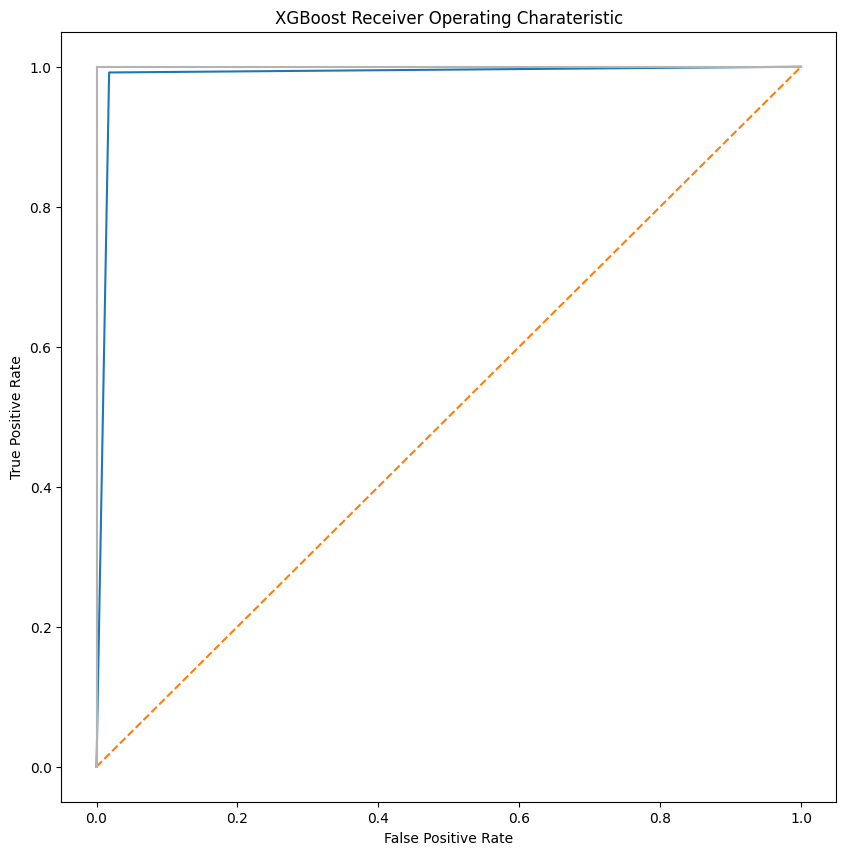

In [ ]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('XGBoost Receiver Operating Charateristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('Accuracy score: ',metrics.accuracy_score(y_test,y_pred))

Accuracy score:  0.982110095107571


#### Modelo Random Forest

In [ ]:
rfc=RandomForestClassifier(n_estimators = 15, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=-1)

In [ ]:
y_pred_rfc= rfc.predict(X_test)

In [ ]:
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

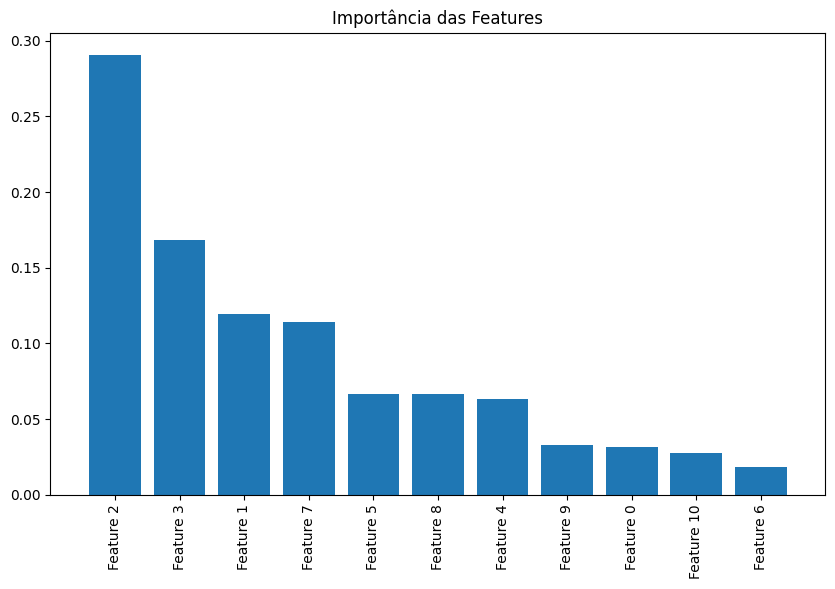

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtendo a importância das features
importances = rfc.feature_importances_

# Criando uma lista de nomes de features (usando índices como substitutos)
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Ordenando as importâncias em ordem decrescente
indices = importances.argsort()[::-1]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


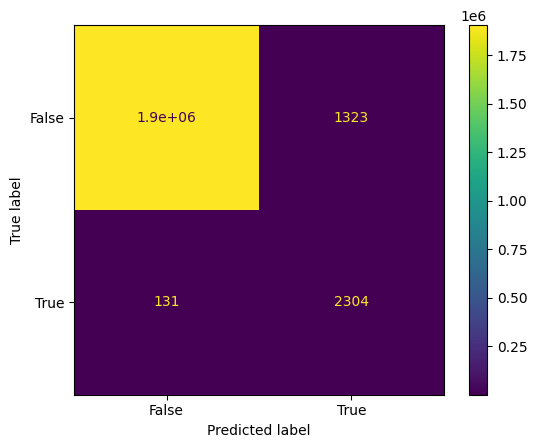

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,y_pred_rfc), display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("\n",metrics.classification_report(y_test,y_pred_rfc))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.64      0.95      0.76      2435

    accuracy                           1.00   1908786
   macro avg       0.82      0.97      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



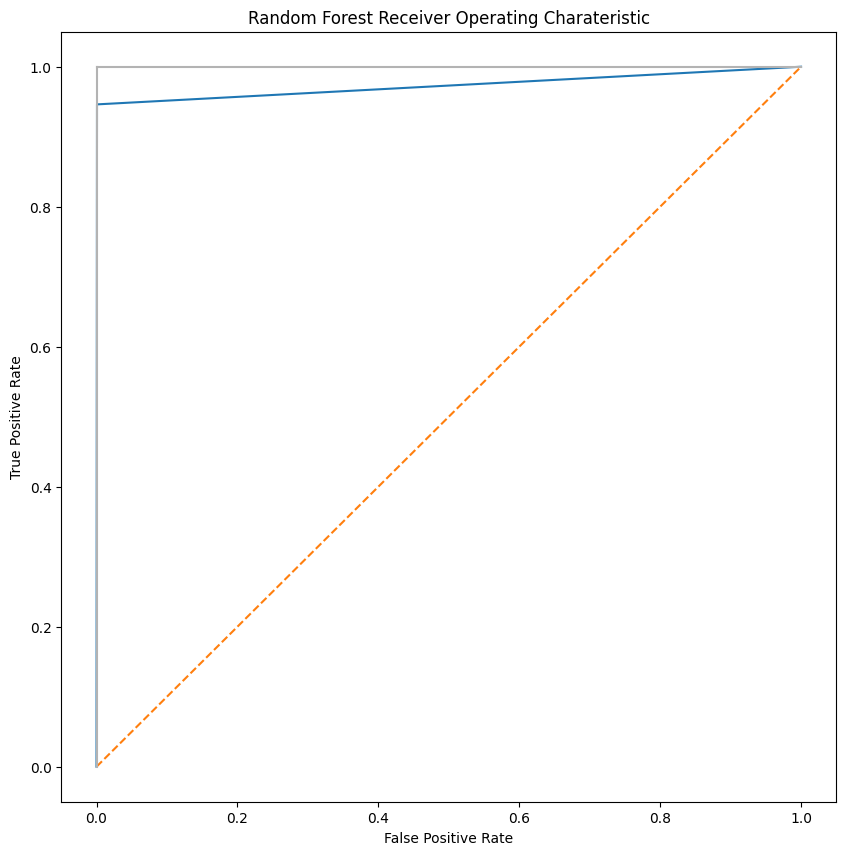

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_rfc)
plt.subplots(1, figsize=(10,10))
plt.title('Random Forest Receiver Operating Charateristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print('AUC score: ',roc_auc_score(y_test, y_pred_rfc))

AUC score:  0.9727536180081905


In [ ]:
print('Accuracy score: ',metrics.accuracy_score(y_test,y_pred_rfc))

Accuracy score:  0.9992382592915078


#### Modelo Regressão Logistica


In [ ]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_lr= lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

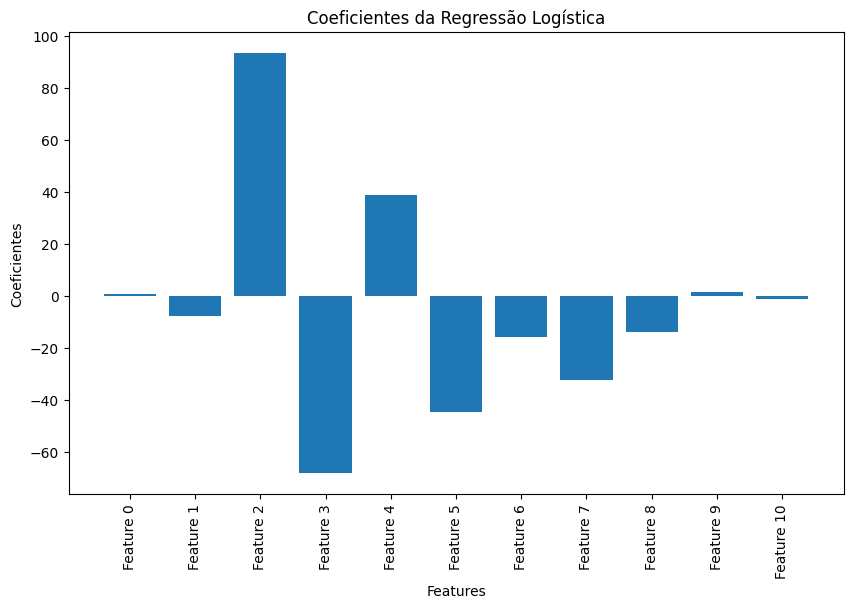

In [ ]:
import matplotlib.pyplot as plt

# Obtendo os coeficientes
coeficientes = lr.coef_[0]

# Criando uma lista de nomes de features (usando índices como substitutos)
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Criando um gráfico de barras para os coeficientes
plt.figure(figsize=(10, 6))
plt.title("Coeficientes da Regressão Logística")
plt.bar(range(len(coeficientes)), coeficientes, align="center")
plt.xticks(range(len(coeficientes)), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Coeficientes")
plt.show()



* Eixo vertical representa os valores dos coeficientes. Coeficientes maiores em magnitude têm um impacto mais forte na predição

* Positivo: Aumento nos valores da feature aumenta a probabilidade da classe positiva.

* Negativo: Aumento nos valores da feature diminui a probabilidade da classe positiva.

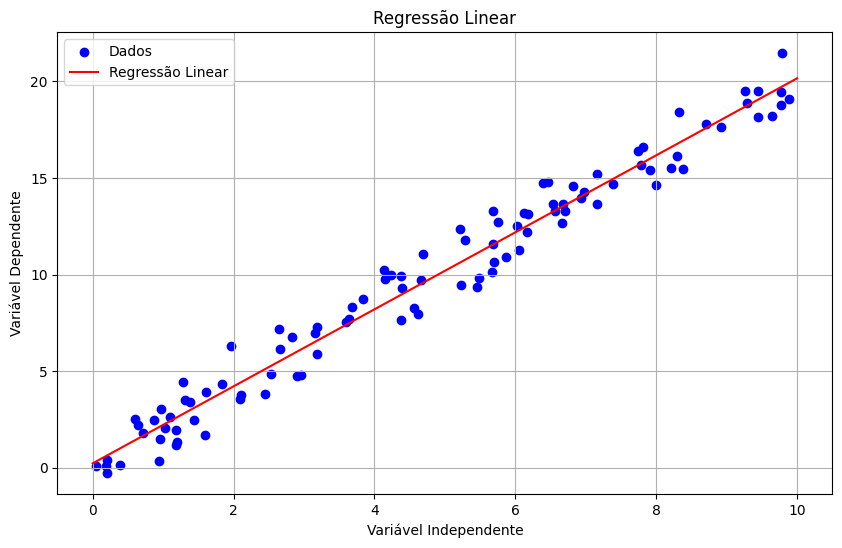

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponha que 'X' seja a variável independente e 'y' seja a variável dependente

# Gerando dados fictícios para exemplo
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Variável independente (0 a 10)
y = 2 * X.squeeze() + np.random.randn(100)  # Variável dependente com um pouco de ruído

# Ajustando a regressão linear
coefficients = np.polyfit(X.squeeze(), y, 1)
polynomial = np.poly1d(coefficients)

# Gerando os pontos para a linha de regressão
x_fit = np.linspace(0, 10, 100)
y_fit = polynomial(x_fit)

# Plotando os dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dados', color='blue')
plt.plot(x_fit, y_fit, label='Regressão Linear', color='red')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()


* Esta linha foi ajustada aos dados com o objetivo de minimizar a soma dos quadrados das diferenças entre os valores observados (pontos azuis)

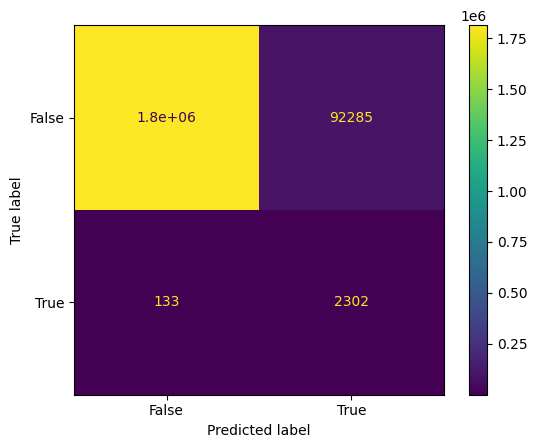

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,y_pred_lr), display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("\n",metrics.classification_report(y_test,y_pred_lr))


               precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906351
           1       0.02      0.95      0.05      2435

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



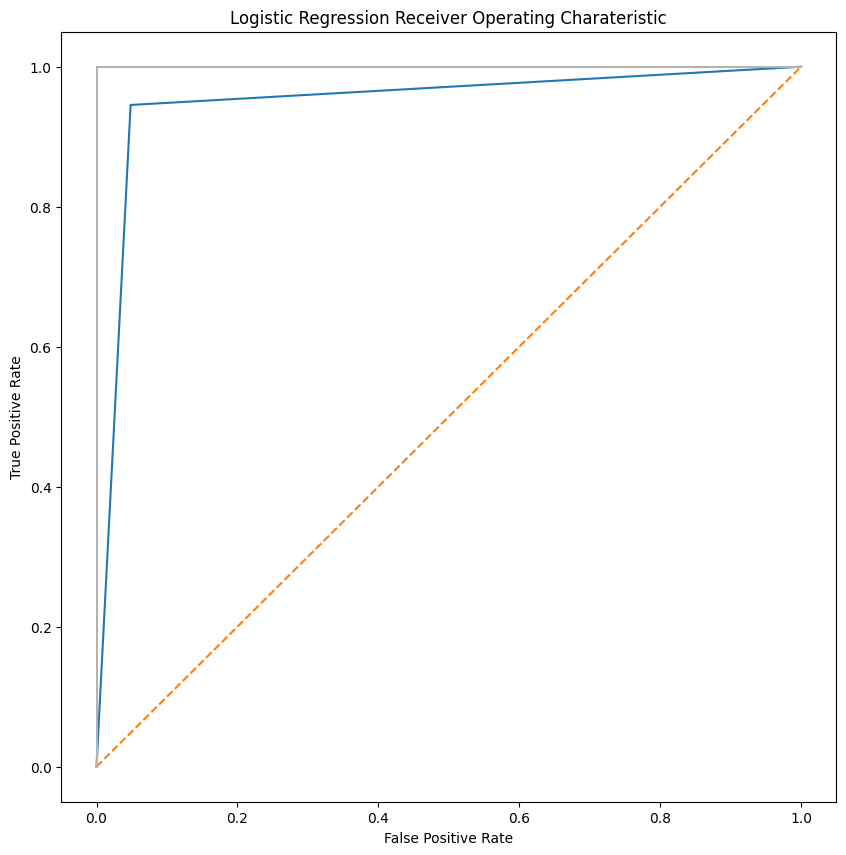

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_lr)
plt.subplots(1, figsize=(10,10))
plt.title('Logistic Regression Receiver Operating Charateristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('AUC score: ',roc_auc_score(y_test, y_pred_lr))

AUC score:  0.9484853192070332


In [ ]:
print('Accuracy score: ',metrics.accuracy_score(y_test,y_pred_lr))

Accuracy score:  0.9515828385162087


# Análise de Crédito

## Contexto

* Recently issued a fresh loan to borrower Issued, Current, Fully Paid, Does not meet the credit policy. Status:Fully Paid

* (Category 1)
Current - All outstanding payments are paid up to date
Fully Paid - All outstanding payments are paid up and loan is finished
In Grace Period, Late (16-30 days), Late (31-120 days)

* (Category 2)
In Grace Period - 1-15 days passed after the due date
Late (16-30 days) - 16-30 days passed after the due date
Late (31-120 days) - 31-120 days passed after the due date
Charged Off , Does not meet the credit policy. Status:Charged Off, Default

* (Category 3)
Default - The borrower is not able to make outstanding payments for an extended period of time
Charged Off - A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible

## Biliotecas & Frameworks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Entendimento, Tratamento e Limpeza dos Dados

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/creditFraud/loan.csv')

<ipython-input-58-8d142a41f3a2>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('/content/drive/MyDrive/creditFraud/loan.csv')


In [ ]:
ds

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
ds.drop(ds.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]), 1, inplace=True)

<ipython-input-61-c6604e6942ae>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ds.drop(ds.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',


In [ ]:
ds.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [ ]:
ds

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,Current,debt_consolidation
887375,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,Current,home_improvement
887376,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,Current,debt_consolidation
887377,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,Current,debt_consolidation


In [ ]:
ds.annual_inc = ds.annual_inc.fillna(0)
ds.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dtype: int64

## Preparação dos Dados & Gráficos

* Criação de Rótulos : Descrição sobre status de empréstimo

In [ ]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

ds.loc[:, 'label'] = ds['loan_status'].apply(classify_label)
ds = ds.drop('loan_status', axis=1)

In [ ]:
def SC_LabelEncoder1(text):
    grade_mapping = {"E": 1, "D": 2, "C": 3, "B": 4, "A": 5}
    return grade_mapping.get(text, 0)

def SC_LabelEncoder2(text):
    emp_length_mapping = {
        "< 1 year": 1, "1 year": 2, "2 years": 3, "3 years": 4, "4 years": 5,
        "5 years": 6, "6 years": 7, "7 years": 8, "8 years": 9, "9 years": 10,
        "10 years": 11, "10+ years": 12
    }
    return emp_length_mapping.get(text, 0)

def SC_LabelEncoder3(text):
    home_ownership_mapping = {"RENT": 1, "MORTGAGE": 2, "OWN": 3}
    return home_ownership_mapping.get(text, 0)

ds["grade"] = ds["grade"].apply(SC_LabelEncoder1)
ds["emp_length"] = ds["emp_length"].apply(SC_LabelEncoder2)
ds["home_ownership"] = ds["home_ownership"].apply(SC_LabelEncoder3)


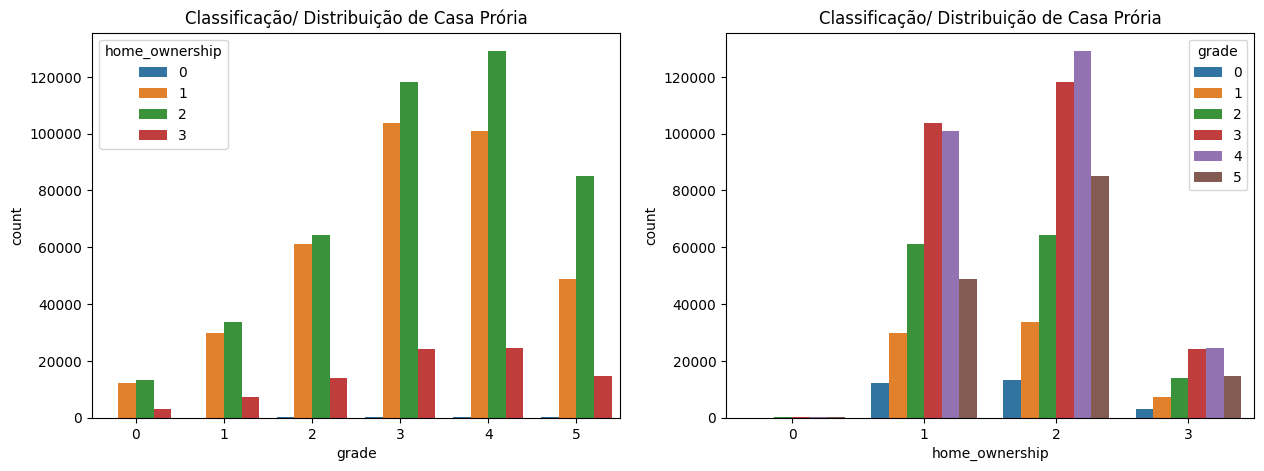

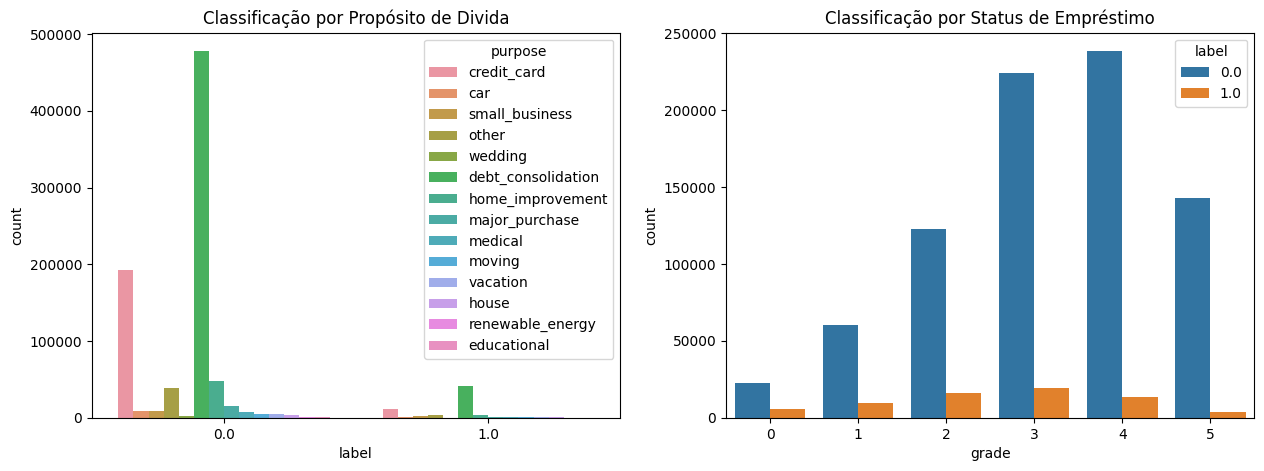

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, x='grade', hue="home_ownership", ax=ax[0]).set_title("Classificação/ Distribuição de Casa Prória");
sns.countplot(data=ds, x='home_ownership', hue='grade', ax=ax[1]).set_title("Classificação/ Distribuição de Casa Prória");
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, x='label', hue='purpose', ax=ax[0]).set_title("Classificação por Propósito de Divida");
sns.countplot(data=ds, x='grade', hue='label', ax=ax[1]).set_title("Classificação por Status de Empréstimo");

    * O número de Mutuários com alta classificação será pequeno em comparação com baixa classificação.
    * A maioria dos objetivos dos mutuários do grupo 0 e 1 são consolidação de dívidas.
    * O maior número de classificações que conseguiu concluir o empréstimo foi o grau 4, enquanto a maioria falhou em concluir o empréstimo foi o grau 3.

Text(0.5, 1.0, 'Quantidade de Empréstimos Agrupados por Propósito')

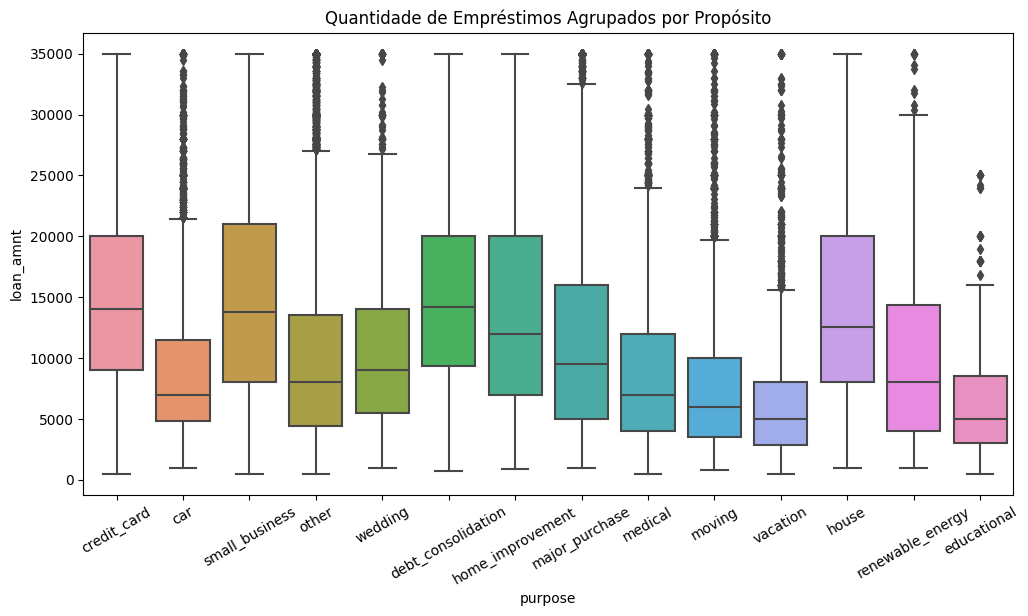

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=ds)
plt.xticks(rotation=30)
plt.title('Quantidade de Empréstimos Agrupados por Propósito')

* Existem 5 categorias mais elevadas para o montante de crédito com os seguintes propósitos: Cartão de crédito, Negócios de micro, pequenas e médias empresas (MPME), Consolidação de dívidas, Melhoria de casa e Compra de uma casa

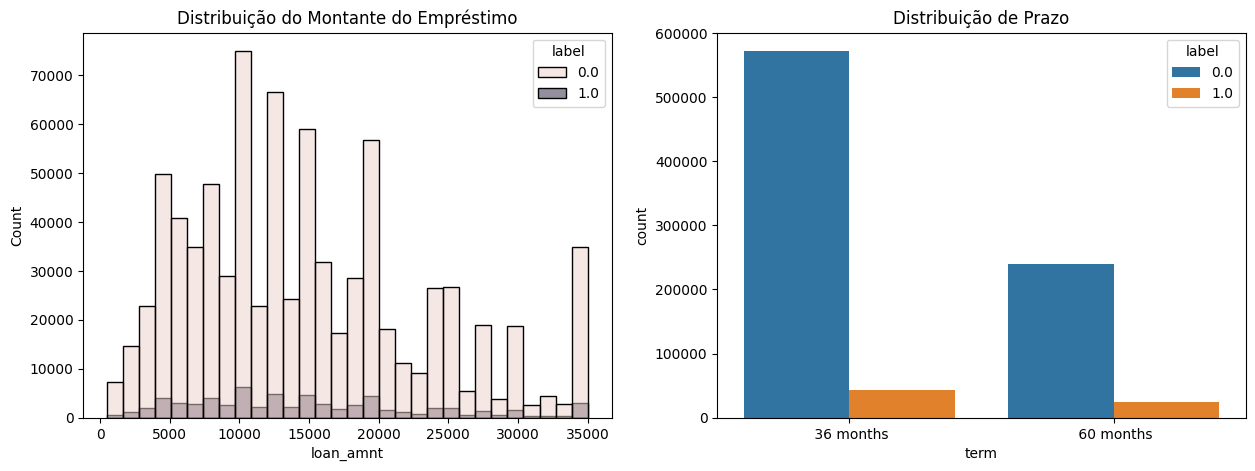

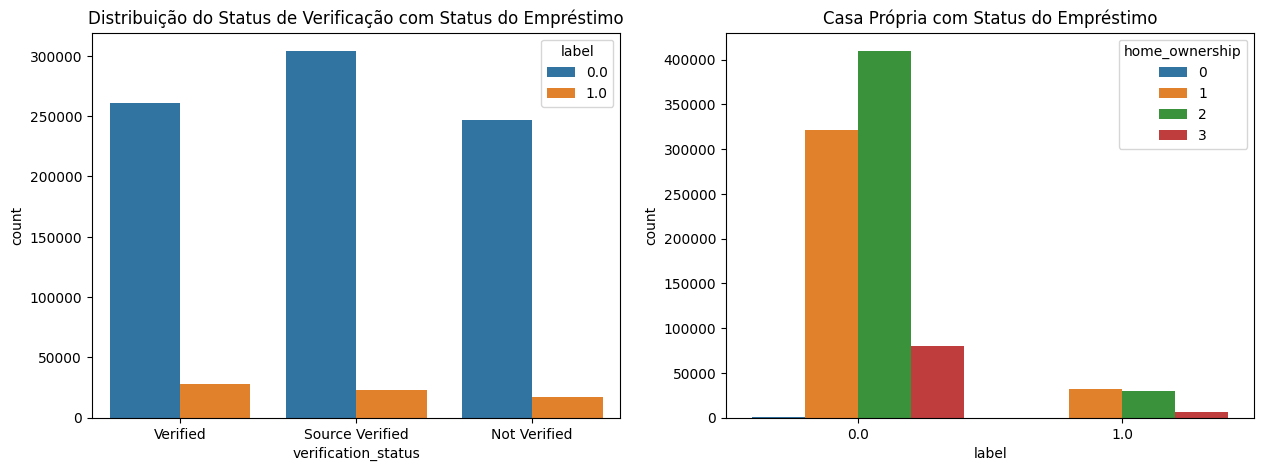

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(ds, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Distribuição do Montante do Empréstimo");
sns.countplot(data=ds, x='term', hue="label", ax=ax[1]).set_title("Distribuição de Prazo");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=ds, hue='home_ownership', x='label', ax=ax[1]).set_title("Casa Própria com Status do Empréstimo");
sns.countplot(data=ds, x='verification_status', hue='label', ax=ax[0]).set_title("Distribuição do Status de Verificação com Status do Empréstimo");

    * O valor nominal da maior dívida é de 10.000 USD.
    * O prazo máximo é de 36 meses, enquanto para 60 meses é quase um terço.
    * A maioria dos créditos que podem ser pagos integralmente é obtida do status de verificação "Verificado".

<ipython-input-71-aa7209d51939>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()
<ipython-input-71-aa7209d51939>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


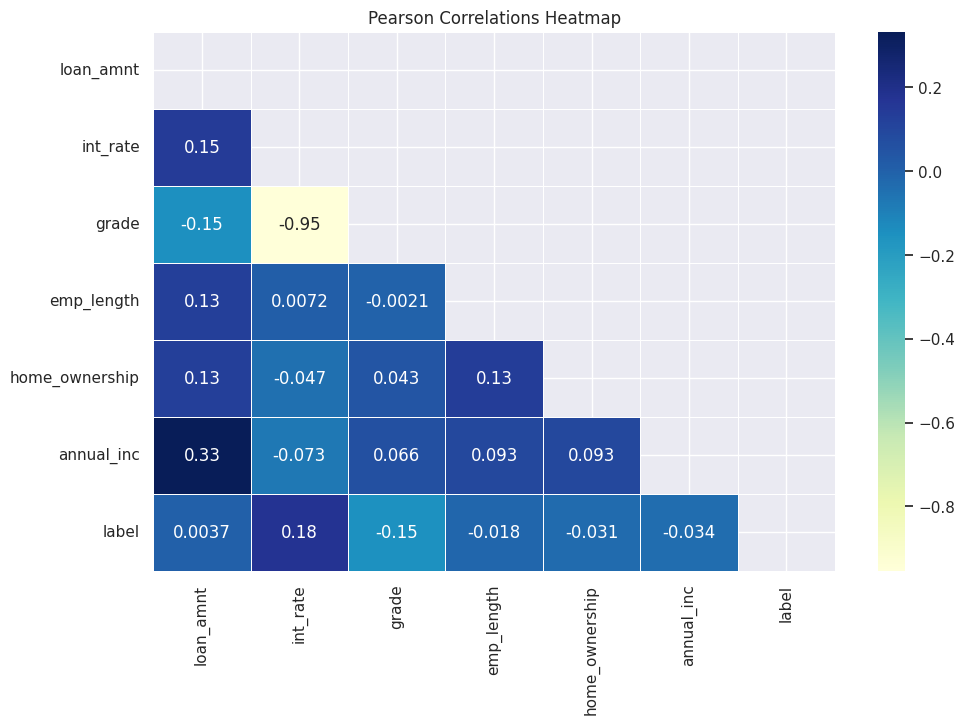

In [ ]:
corr = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','purpose','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

* The amount of credit is very dependent on the annual income of the borrower

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [ ]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(ds[col])
    ds[col] = le.transform(ds[col])
ds.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,1,0.0
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,0,1.0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,11,0.0
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,9,0.0
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,9,0.0


In [ ]:
ds.label = ds.label.fillna(1)

* CLUSTERING

## Machine Learning


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

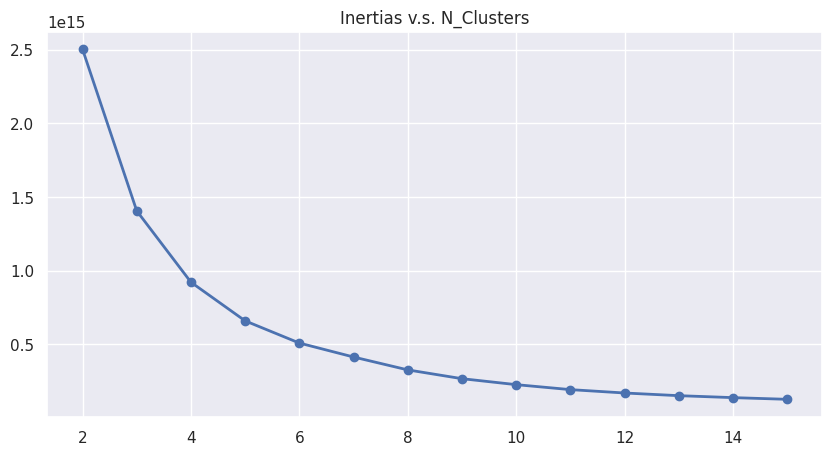

In [ ]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(ds)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

* Analysis:
"Elbow" on the chart above is at 4. The number of clusters must be 4.

In [ ]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(ds)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_clustered = ds[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

<ipython-input-77-ec6fcd0c7a34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


* Predicting Risk: Using the K-Nearest Neighbors Classification Model

In [ ]:
X, y = ds.drop("label", axis=1), ds["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [ ]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

* Como a Classificação KNN (K-Nearest Neighbors) leva muito tempo e memória para prever, é possível utilizar outros modelos de ML como SVC, DecisionTree, RandomForest e GaussianNaiveBayes..

* No entanto, neste caderno, usamos apenas o Modelo KNN, e está concluído e obteve uma boa precisão de 91,4%